In [67]:
# Import all necessary packages
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

We import the necessary libraries here. Since we are using the bag of words model, we can construct it using the count vectorizer and logistic regression model for the binary classification predictions. We also import pandas to load our data into a dataframe that we can use to perform data cleaning and preprocessing. We can import the re library to make use of regular expressions in our data cleaning process. We can import stopwords and the word net lemmatizer from the nltk library to remove stopwords and lemmatize the data during the cleaning stage. We can import the seaborn library for better data visualization. Finally, we import pyplot from matplotlib to generate plots and figures for certain measurements, metrics, and data visualizations.

In [68]:
# Mount the training and testing datasets and load them into pandas dataframe variables

df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

We can read in our training and testing datasets here into pandas dataframe variables using the read_csv function from the pandas library class.

In [69]:
# Print the first couple entries in the training dataframe to get a general understanding of the training dataset

df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Here, we just observe some of the data in the training set. As we can see, there are 5 columns. For our task, we may only be concerned with a couple of these columns to obtain decent results.

In [70]:
# Print some general information regarding the training set. As we can see, there are various properties that may have missing and
# non-numeric values that we need to address during the preprocessing stage.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Now, we print some information regarding the training dataset. We can see that there are different non-null counts for each of the columns in the training set. We can also observe the specific datatypes of each column.

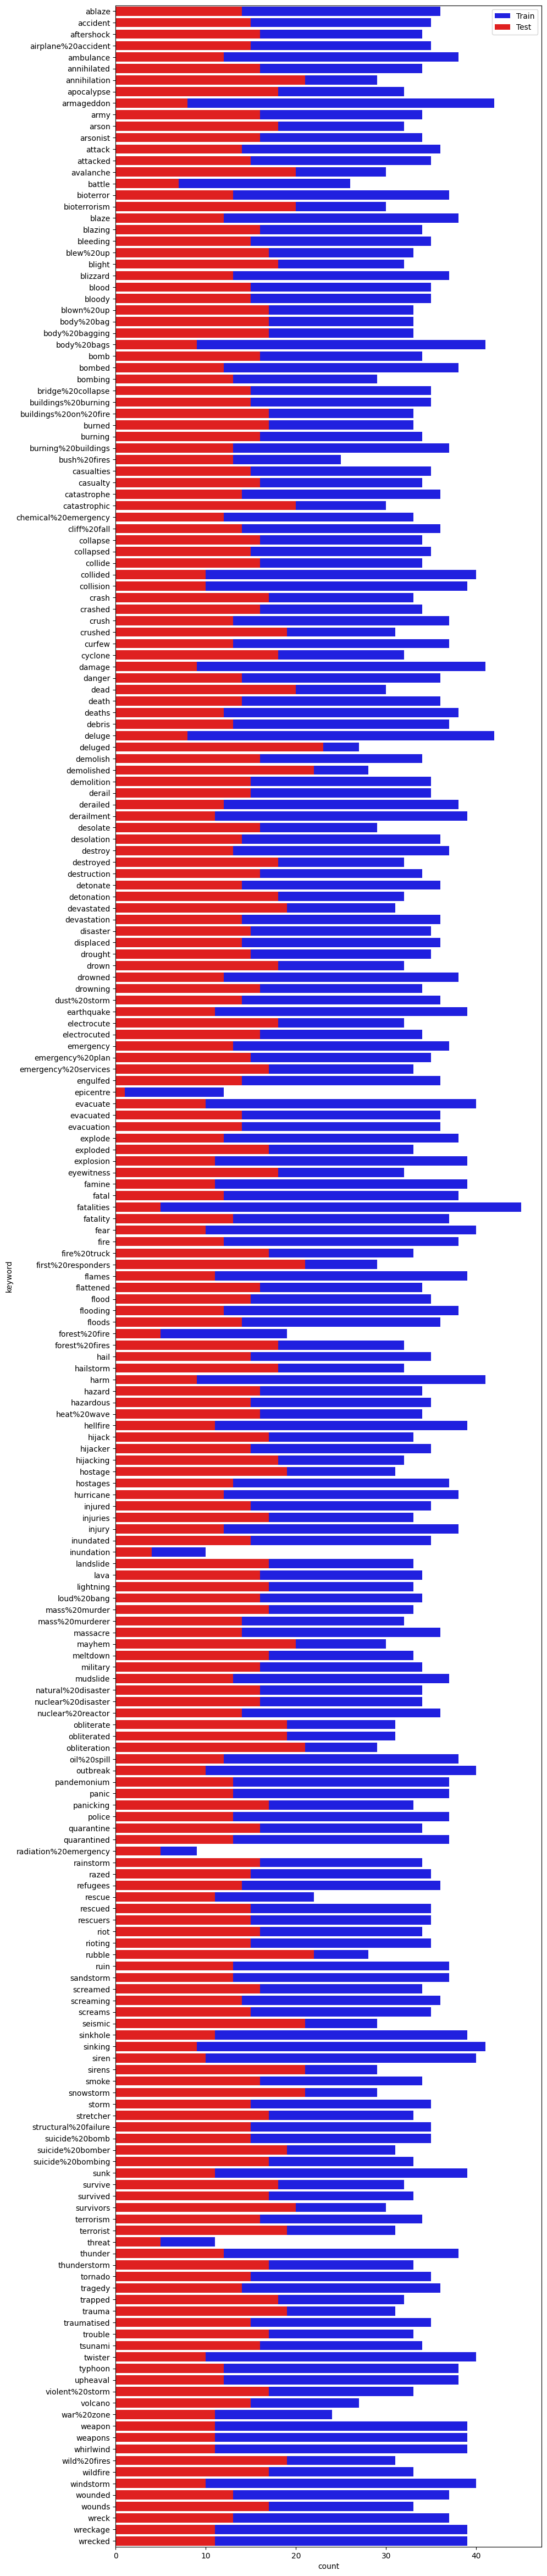

In [71]:
# Here we can see the distribution of the keywords within the training and the testing set and which keywords are more prevalent in each
# dataset.

plt.figure(figsize=(10,60))
sns.countplot(y=df_train['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=df_test['keyword'], color=(1,0,0), label='Test')
plt.legend()

We can plot the distribution of the keywords belonging to the training and testing set to get a sense of which keyword is more prevalent in which dataset and the prevalence of each keyword in both datasets as a whole by observing the total count of the keywords occuring in both datasets.

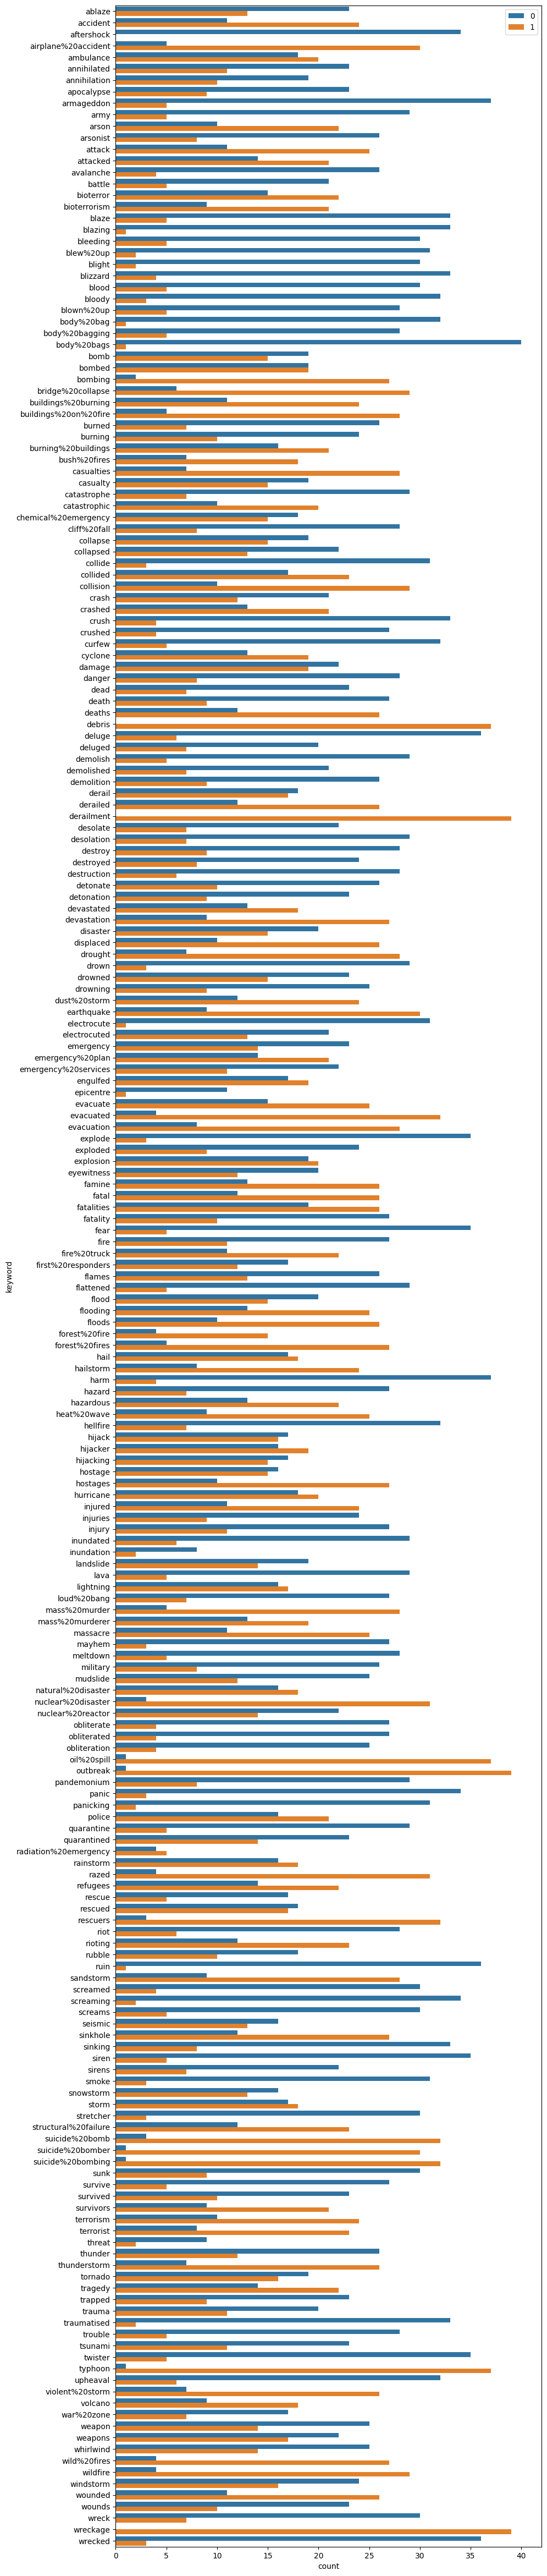

In [72]:
# Here we can generate a bar plot showing the associativity of the keywords to each class [real-disasater, non-disaster] to understand
# if there is any reason to consider the usage of the keywords associated with the tweet in the training process.

plt.figure(figsize=(10,60))
sns.countplot(data = df_train, y='keyword', hue='target')
plt.legend()

Here, we can plot a figure depicting how much each keyword is associated with the disaster label and the non-disaster label. This can be important for any possible feature engineering we may have to perform as the keyword may serve as an indicator that a tweet containing a certain keyword belongs to a specific class.

In [73]:
nltk.download('all')
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    text = text.lower() # lowercase all capitalized text

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs

    html=re.compile(r'<.*?>')

    text = html.sub(r'',text) #Removing html tags

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations

    text = [word.lower() for word in text.split() if word.lower() not in sw] #lowercase any non-stopword text and include only non-stopwords in new list

    text = [lemmatizer.lemmatize(word) for word in text] #lemmatize the words in the text if necessary

    text = " ".join(text) #removing stopwords and lemmatizing

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis

    return text #return the cleaned text

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Here, we define the function that is responsible for our data cleaning phase. We want to get the text into a state that is ready to input to our bag of words model. However, we first need to remove any unnecessary characters, tokens, stopwords, and/or details from the original text. We can do so by converting the text to all lowercase and removing characters that aren't the alphabetic characters and the '.', '!', '?', and ',' characters as these may be important to understand the context or tone of a specific tweet

We can also remove URLs, html tags, punctuations, and emoticons, emojis, symbols, pictographs, flag symbols on iOS, and map symbols.

Finally, we perform lemmatization on our text to remove the unnecessary part of each word (token) and retain only the part that is needed to understand its semantic meaning. For example, if we have the words driving, drove, drives, etc. we would lemmatize these words to retain their main semantic meaning which would be 'drive'.

Lemmatization made more sense in our specific application as opposed to stemming. The reason behind this is that we found stemming may not be as helpful because of its more simple approach to text processing. Therefore, it may produce more base rooted words that have less helpful semantic meanings than lemmatization would produce. The advantage to stemming is that it is a less complex approach that generally works faster than lemmatization. However, we tried using stemming and the results were unfavorable in our case. On top of that, we were not as concerned with time and more concerned with the quality of the data we fed to our models. Therefore, we preferred using lemmatization for this model.

In [74]:
# Now we need to preprocess the dataset. We can apply the text cleaning solution as shown above to the training set and fill null values
# in the column entries with empty strings so we can properly append the keyword to the text.

def preprocess(df):
  df = df.fillna('', axis=1)
  df['text'] = df['keyword'] + " " + df['text']
  df.drop(["id", "keyword", "location"], inplace=True, axis=1)
  df['text'] = df['text'].apply(lambda x: clean_text(x))
  return df

Here, we define the preprocessing function which does a couple things. Since we observed earlier that the keyword column may be an important feature to consider in our model training, we need to fill the null values within the keyword column with empty strings so that when we do add the keyword to the text, we dont add a null value or cause any problems down the line.

Next, we can perform some feature engineering by combining the keyword and text features into the text feature. This is done because the keyword may have some important usage in the text field during training. In our case, from running multiple experiments, we generally determined that it was beneficial to our model to include the keyword in the text columm.

After that, we can drop the remaining unnecessary columns in the dataframe. There wasn't a use for the location feature because in the multiple experiments we performed, it seemed that the location was less beneficial to include and didnt produce any meaningful boost or decline in the metrics for our model. Therefore, we decided to drop that column along with the remaining unnecessary features.

Finally, we want to run our text through our text cleaning function to get our text data into a state that we can use for training the bag of words model.

In [75]:
# preprocess the training and testing datasets

df_train = preprocess(df_train)
df_test = preprocess(df_test)

Here, we simply call the preprocess function on the training and testing datasets for reasons mentioned previously.

In [76]:
df_train.isna().sum()

text      0
target    0
dtype: int64

This is simply a measure of how many null values are in the preprocessed training dataset. We want there to be no null values so that we get the most accurate results possible from our model.

In [77]:
df_train.shape

(7613, 2)

In [78]:
df_test.shape

(3263, 1)

In the above two cells, we print the shapes of our training and testing datasets after preprocessing.

In [79]:
df_train

,text,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,", people receive wildfire evacuation order cal...",1
4,got sent photo ruby alaska smoke wildfire pour...,1
...,...,...
7608,two giant crane holding bridge collapse nearby...,1
7609,aria ahrary thetawniest control wild fire cali...,1
7610,utc km volcano hawaii http tco zdtoyd ebj,1
7611,police investigating e bike collided car littl...,1


Here, we get a look at our preprocessed training set. We can see that when browsing the later entries of the dataset, the text is clean and we have prepended the keyword to the text field as part of our feature engineering efforts.

<Axes: >

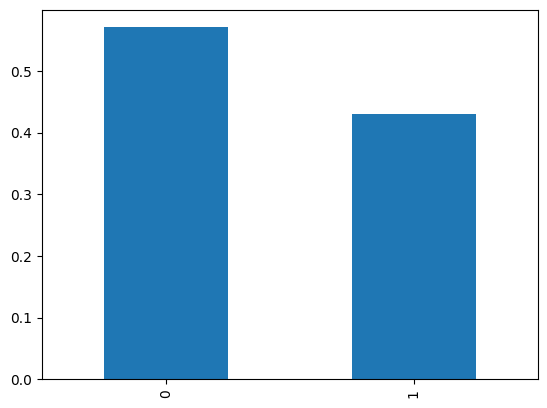

In [80]:
# To get an idea of how balanced this dataset is, we can plot the normalized label counts for each class [non-disaster, real-disaster] as
# a bar chart.

df_train['target'].value_counts(normalize=True).plot.bar()

Here, we want to get an idea of how balanced our dataset is between the two classes. As shown in the figure, this dataset is considerably imbalanced. This is a very important concern to address because data imbalances can yield less preferrable scores by up to 20%. In our case, addressing these data imbalances yielded a boost in f1 score by about 10%.

In [81]:
# Since there is a considerable data imbalance, we need to address this by performing some further preprocessing. One method to handle this
# phenomenon is known as oversampling. This technique involves repeatedly sampling (with replacement) the data from the imbalanced minority
# class (real-disaster) at random and adding them to the training set to correct the imbalance.

from imblearn.over_sampling import RandomOverSampler

# Randomly oversample the minority class (real-disaster class)
ros = RandomOverSampler(random_state=42)
print(df_train['target'].dtype)
df_train, _ = ros.fit_resample(df_train, df_train['target'].astype('int'))

object


To correct this data imbalance, we can use data augmentation methods as a potential solution. Our specific data augmentation approach was to use random oversampling on the minority class (class label = 1) to get the dataset into a balanced state between both classes.

The random oversampling approach will randomly and repeatedly sample, with replacement, data from the minority class and add this sampled data back to the training set to correct the imbalance and yield more favorable results.

In our case, when performing this augmentation of our data, we saw an improvement in f1 score from about 0.73 to about 0.83 which is a 10% boost. Therefore, it is important to consider the benefits of data augmentation in any machine learning or natural language processing task when there is a class imbalance in the dataset to feed valuable and balanced data into a model for training so that more meaningful results can be produced and better metrics can be outputted.

<Axes: >

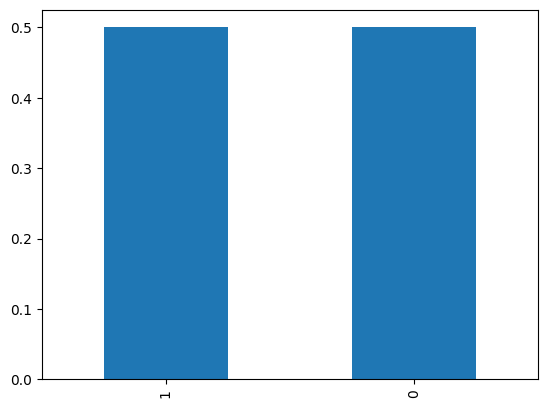

In [82]:
# After performing the oversampling technique, the distribution of all tweets should be even per the two classes [real-disaster, non-disaster].
# There should no longer be a class imbalance.

df_train['target'].value_counts(normalize=True).plot.bar()

As we can see, after performing the random oversampling data augmentation approach on the minority class, we obtain an even and balanced dataset.

In [83]:
df_train

,text,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,", people receive wildfire evacuation order cal...",1
4,got sent photo ruby alaska smoke wildfire pour...,1
...,...,...
8679,rescued month old baby girl rescued coastguard...,1
8680,flood pmharper worry sure climate nothing hail...,1
8681,tornado ok severe thunderstorm warning issued ...,1
8682,drowning drowning acrylic tco x fubqbgg,1


As we can see, the training set increased in size to 8684 entries from 7613 entries. This is to be expected as we just oversampled our minority class to correct the imbalance in the dataset.

In [84]:
# Split the training set into a training and validation set to test the model's ability to generalize

TRAIN_SPLIT = 0.9
VAL_SPLIT = 0.1

from sklearn.model_selection import train_test_split

X = df_train["text"]
y = df_train["target"]
y=y.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df_test["text"]

Here, we begin the initial stages of training. We first determine which part of our dataframe is the training data and which part of the dataframe are the training labels (ground truth). We assign these to values X and y, respectively. Then, we split the training set into a training and validation set according to a train test split value. In our case, after multiple experiments in an attempt to tune this parameter, we found that 90% of the training data used for training and 10% of the training data used for validation produced the most favorable results for our bag of words model. We also assign the text feature of the testing dataset into its own X_test variable to be used at a later stage.

In [85]:
X_train

1323    burning x counter act burning alexandrian library
7971    catastrophic invading iraq catastrophic mistak...
4405    hijacking hot funtenna hijacking computer send...
6562    survived survived spanish sweet ritual tco ini...
994     body bagging bomairinge elutranscendent straig...
                              ...                        
5734    rescuer video picking body water rescuer searc...
5191    obliterated dude obliterated meek mill dont ju...
5390    panic panic attack bc enough money drug alcoho...
860     blood omron hem c automatic blood pressure mon...
7270    whirlwind moved england five year ago today wh...
Name: text, Length: 7815, dtype: object

Here, we obtain the part of the training dataset that will be used as input to the first part of our bag of words model, the count vectorizer. This part of the training dataset contains the text information that the model will be trained on.

In [86]:
# Train Bag of Words model on the X_train corpus training data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(7815, 19553)

Here, we initialize out count vectorizer and fit our training data. The result will be a transformed representation of our training data in a vectorized form which represents the frequency counts of each token (word) within the text. This will be very important for the bag of words model as models cant receive  and process text input because they can only work with numbers. This was a way for us to convert our text into a representation that our bag of words model can understand and use to train on.

In [87]:
# Visualize the feature matrix generated by the CountVectorizer. Each key in the printed dictionary is the word from the text document fed
# to the CountVectorizer and the value for that key is the index of that word in the feature matrix

print(f"Vocabulary mapping for disaster text corpus : \n {cv.vocabulary_}")

Vocabulary mapping for disaster text corpus : 
 {'burning': 2067, 'counter': 3193, 'act': 124, 'alexandrian': 390, 'library': 9510, 'catastrophic': 2364, 'invading': 8028, 'iraq': 8090, 'mistake': 10554, 'diplomacy': 4023, 'need': 11153, 'replace': 13896, 'constant': 3076, 'threat': 16595, 'war': 18095, 'israel': 8136, 'http': 7427, 'tco': 16294, 'yqjpn': 19201, 'quux': 13456, 'hijacking': 7158, 'hot': 7355, 'funtenna': 6037, 'computer': 3015, 'send': 14828, 'data': 3594, 'sound': 15484, 'wave': 18155, 'black': 1599, 'hat': 6931, 'jcyxhq': 8326, 'az': 1074, 'prebreak': 12893, 'best': 1425, 'survived': 16047, 'spanish': 15521, 'sweet': 16094, 'ritual': 14130, 'iniqzfyioi': 7925, 'body': 1734, 'bagging': 1128, 'bomairinge': 1749, 'elutranscendent': 4792, 'straight': 15831, 'trapped': 16940, 'nz': 11609, 'hollywood': 7274, 'movie': 10799, 'miner': 10491, 'released': 13829, 'chile': 2605, 'ajisa': 328, 'hugomatz': 7446, 'siren': 15154, 'ouvindo': 12069, 'sleeping': 15263, 'awn': 1043, 'bom

Here, we can just get a quick visualization of the terms within the training data mapped to their respective feature indicies within the output of the count vectorizer.

In [88]:
y_train

1323    1
7971    1
4405    0
6562    0
994     0
       ..
5734    1
5191    0
5390    0
860     0
7270    1
Name: target, Length: 7815, dtype: int64

Here are the labels for our training data. 0 represents a non-disaster class and 1 represents a disaster class.

In [89]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', class_weight='balanced', dual=True, C=0.85)
history = lr.fit(X_train_cv, y_train)


# transform X_val using CV
X_val_cv = cv.transform(X_val)


# generate predictions
val_predictions = lr.predict(X_val_cv)
val_predictions

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

Now we enter the 2nd part of our bag of words model. We initialize a logistic regression model from the sci-kit learn library. Upon many experiments, we found that these parameters used in our logistic regression model produced the most favorable results. We fit the vectorized training data and labels on the logistic regression model. Finally, we vectorize the validation data and return our models predictions on the vectorized validation dataset.

In [90]:
# Print the classification report that returns the precision, recall, f1-score, and support classification metrics from the training stage

from sklearn.metrics import classification_report
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       440
           1       0.83      0.85      0.84       429

    accuracy                           0.84       869
   macro avg       0.84      0.84      0.84       869
weighted avg       0.84      0.84      0.84       869



Here, the classification report on the validation dataset for the bag of words model is produced. This is a report that displays some of the most important metrics and measurements that our model produced. As shown in the report, we obtained an f1 score of 0.84 which is quite favorable as the top 100 f1 scores our of the 854 submissions in the kaggle competition were all above 0.8. Therefore, we can state that the bag of words model was a decent performer on this task.

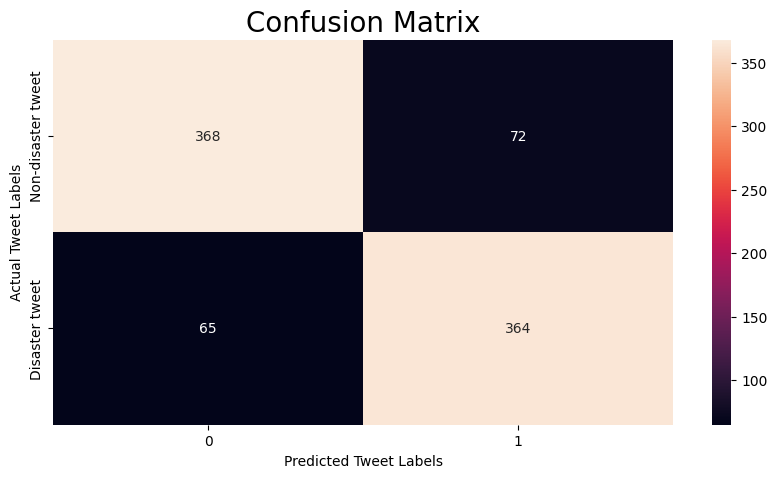

In [91]:
# Generate the confusion matrix that shows the true positive, true negative, false positive, and false negative labels

matrix = confusion_matrix(y_val, val_predictions)
labels= ["Non-disaster tweet", "Disaster tweet"]
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(matrix, annot=True, fmt="g", ax=ax)
plt.xlabel("Predicted Tweet Labels")
plt.ylabel("Actual Tweet Labels")
plt.title("Confusion Matrix", size=20)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.savefig('confusion_matrix.png')
plt.show()

Here, we generate the confusion matrix on our validation dataset. As shown in the matrix, we have a high number of true positives and true negatives and a low number of false positives and false negatives, effectively minimizing the misprediction rate. This establishes that the bag of words model performed well on this task. We can finally save this matrix as a png file using pyplot.

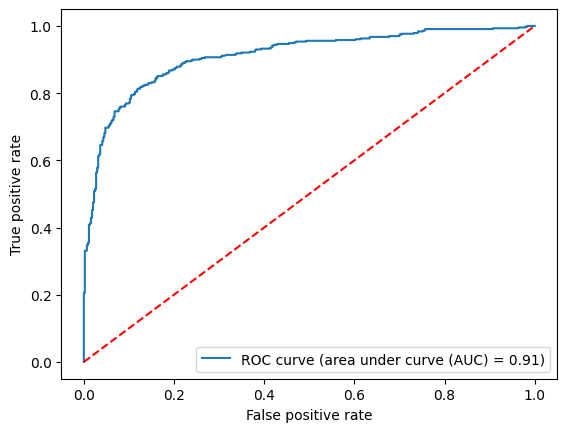

In [92]:
# generate the ROC curve for the validation set

val_pred_proba = lr.predict_log_proba(X_val_cv)[:,1]
auc = roc_auc_score(y_val, val_pred_proba)
fpr, tpr, _ = roc_curve(y_val, val_pred_proba)

plt.plot(fpr, tpr, label="ROC curve (area under curve (AUC) = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

Here we generate the roc curve for our bag of words model on the validation data. The more the curve stays towards the upper left side, the better the model performed on the task. In our case, as shown in the roc curve figure above, our bag of words model performed quite well. The ROC auc score we obtained was 0.91, which is a solid measurement for the area under curve metric.

In [93]:
# Print the accuracy for the training set

print("Training set accuracy: ", lr.score(X_train_cv, y_train))

Training set accuracy:  0.9695457453614843


Here we have our accuracy metrics for our bag of words model on the training data. As we can expect, the accuracy on the training data is very good at almost 0.97.

In [94]:
# Print the accuracy for the validation set

print("Validation set accuracy: ", lr.score(X_val_cv, y_val))

Validation set accuracy:  0.8423475258918297


Here we have our validation set accuracy. This was also favorable as we obtained an accuracy of 0.84, which is respectable. Obviously there is some concern regarding the slight amount of overfitting of our model. However, that might have stemmed from either the lack of training data provided in the competition, the complexity of our bag of words model, or a combination of both for which we tried our best to optimize during our hyperparameter tuning stage.

In [95]:
# Print the F1-score metric for the validation set

from sklearn.metrics import f1_score
f1 = f1_score(y_val, val_predictions)
print("F1 Score: ", f1)

F1 Score:  0.8416184971098266


To get a specific measurement of our models f1 score, we print out the f1 score metric using our data on the f1 score function provided in the sklearn.metrics library. As we can see, our f1 score is quite favorable at 0.841

In [96]:
# Preparing submission

# transform X_test using CV
X_test_cv = cv.transform(X_test)


# generate predictions
test_predictions = lr.predict(X_test_cv)
test_predictions

array([0, 0, 1, ..., 1, 1, 0])

Here, we prepare running our model on the testing set to verify the robustness and integrity of our model. First, as with the training and validation data, we need to vectorize the testing data to get the testing data into a form that our model can understand. Next, we generate the predictions of the disaster/non-disaster tweets using our trained model and get the predictions for our testing dataset.

In [97]:
predicted_df = df_test.copy()
predicted_df['target'] = test_predictions

Here, we prepare our test results for submission. We can created a new dataframe that copies over our testing set and our models predicted label for each tweet.

In [98]:
# Generate some predictions on the testing data

predicted_df

,text,target
0,happened terrible car crash,0
1,"heard earthquake different cities, stay safe e...",0
2,"forest fire spot pond, goose fleeing across st...",1
3,apocalypse lighting spokane wildfire,1
4,typhoon soudelor kill china taiwan,1
...,...,...
3258,earthquake safety los angeles safety fastener ...,0
3259,storm ri worse last hurricane city amp others ...,1
3260,green line derailment chicago http tco utbxlcbiuy,1
3261,meg issue hazardous weather outlook hwo http t...,1


Here, we have our prediction dataframe showing the performance of our bag of words model on the testing dataset. As we can observe, the model performs quite well classifying each tweet. Going through the prediction dataframe, we can see that in the majority of cases, the predictions made sense given the context, tone, and situation of the tweet.

In [99]:
# Save testing set predictions dataframe into a csv file.

submission_df = pd.read_csv(f'/content/sample_submission.csv')
submission = pd.DataFrame({"id": submission_df['id'],
            "target":test_predictions})
submission.to_csv('/content/submission.csv', index=False)

Here, we simply load our initial sample submission csv file and use the id field within it to map the data within our predictions dataframe to their original ids. Then, we simply convert the dataframe to a csv file containing our models predictions on the testing dataset.